# Sumário

1. [**Instalação de Bibliotecas, Imports e Carregamento do Arquivo**](#1.-Instalação-de-Bibliotecas,-Imports-e-Carregamento-do-Arquivo)
2. [**Base de Dados**](#2.-Base-de-Dados)
3. [**Diagnóstico e Qualidade de Dados**](#3.-Diagnóstico-e-Qualidade-de-Dados)
    - 3.1 [Análise de Metadados e Falsos Nulos](#3.1-Análise-de-Metadados-e-Falsos-Nulos)
    - 3.2 [Identificação de Outliers de Duração](#3.2-Identificação-de-Outliers-de-Duração)
    - 3.3 [Distribuição de Runtime](#3.3-Distribuição-de-Runtime)
    - 3.4 [Relevância Estatística: Votos vs Nota](#3.4-Relevância-Estatística:-Votos-vs-Nota)
4. [**Panorama Geral**](#4.-Panorama-Geral)
    - 4.1 [Indicadores Chave de Performance (KPIs) em Dashboard Cards](#4.1-Indicadores-Chave-de-Performance-(KPIs)-em-Dashboard-Cards)
    - 4.2 [Top 10 Filmes Mais Populares até 2024](#4.2-Top-10-Filmes-Mais-Populares-até-2024)
    - 4.3 [Distribuição dos Gêneros dos Filmes]()
5. [**Análise Temporal**](#5.-Análise-Temporal)
    - 5.1 [A Qualidade dos Filmes ao Longo do Tempo](#5.1-A-Qualidade-dos-Filmes-ao-Longo-do-Tempo)
    - 5.2 [Sazonalidade de Lançamentos (por mês)](#5.2-Sazonalidade-de-Lançamentos-(por-mês))
    - 5.3 [Evolução da Receita Total da Indústria Cinematográfica (1920-2024)](#5.3-Evolução-da-Receita-Total-da-Indústria-Cinematográfica-(1920-2024))
6. [**Segmentação de Mercado e Produção**](#6.-Segmentação-de-Mercado-e-Produção)
    - 6.1 [Contagem de Produtoras por Filme](#6.1-Contagem-de-Produtoras-por-Filme)
    - 6.2 [Produtoras com Mais Filmes Produzidos](#6.2-Produtoras-com-Mais-Filmes-Produzidos)
    - 6.3 [Análise da Receita por Quantidade de Produtoras](#6.3-Análise-da-Receita-por-Quantidade-de-Produtoras)
    - 6.4 [Top 15 Gêneros por Receita Total](#6.4-Top-15-Gêneros-por-Receita-Total)
    - 6.5 [Top 15 Países Produtores (por volume)](#6.5-Top-15-Países-Produtores-(por-volume))
    - 6.6 [Correlação entre Variáveis Financeiras e Popularidade](#6.6-Correlação-entre-Variáveis-Financeiras-e-Popularidade)
    - 6.7 [Duração x Popularidade]()
7. [**Análise Financeira**](#7.-Análise-Financeira)
    - 7.1 [Heatmap de ROI médio por década e gênero (top 8)](#7.1-Heatmap-de-ROI-médio-por-década-e-gênero-(top-8))
    - 7.2 [Orçamento vs Lucro](#7.2-Orçamento-vs-Lucro)

# 1. Instalação de Bibliotecas, Imports e Carregamento do Arquivo

In [4]:
# Instalação das bibliotecas necessárias
%pip install pandas --quiet
%pip install numpy --quiet
%pip install matplotlib --quiet
%pip install seaborn --quiet

# Célula 1: carregar o arquivo dados_brutos.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Lê o CSV que está na mesma pasta do notebook
df = pd.read_csv('dados_brutos.csv', encoding='utf-8')
df

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.9520,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.2410,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.6430,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.9320,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.0820,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350157,836789,Pengantin,0.000,0,Released,2020-05-07,0,13,False,NaN,...,Pengantin,Prospective martyrs face their last night.,0.6000,/7KJDGKybSFGZKQ7hiIWpZggVT2.jpg,NaN,Drama,NaN,Indonesia,Indonesian,NaN
1350158,836790,Comme les autres,0.000,0,Released,2020-05-06,0,0,False,/nRbHTR7aWXa5J2zGs8gA0WceLaW.jpg,...,Comme les autres,NaN,0.6000,/9oPhREV9E4zuskLj3sml6wgIgwI.jpg,NaN,Documentary,"Adenium TV France, France Télévisions",France,French,NaN
1350159,836792,Abu Ammar is Coming,0.000,0,Released,2016-01-01,0,6,False,NaN,...,Abu Ammar is Coming,A photograph shows men staring out of a window...,0.6000,NaN,NaN,NaN,Shobak Films,"Bangladesh, Lebanon, United Kingdom","Bengali, English",NaN
1350160,836793,For What Sake are You in a Tailcoat?,0.000,0,Released,1993-01-01,0,70,False,NaN,...,А чой-то ты во фраке?,NaN,0.6000,/epYAo3ZrMvwS7yKEGn108ZjpyKo.jpg,NaN,Comedy,NaN,Russia,Russian,NaN


# 2. Base de Dados

### Sobre
O presente projeto utiliza o dataset do **TMDB (The Movie Database)**, uma base que compila metadados de aproximadamente 1 milhão de obras cinematográficas. Armazenado em formato CSV, o arquivo possui 603.14 MB e estrutura composta por 24 colunas, incluindo variáveis como títulos, gêneros, orçamentos, receitas e índices de popularidade. Pela sua amplitude e profundidade histórica, a base é ideal para estudos de ciência de dados, análises de tendências de mercado e desenvolvimento de sistemas de recomendação.

### Importação da Base de Dados
O processo de importação da base de dados concluído com sucesso, sem inconsistências detectadas. 
Para fins de verificação e conferência da estrutura, apresentam-se abaixo os **cinco registros iniciais**.

In [22]:
df

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,genres,production_companies,production_countries,spoken_languages,keywords,qtd_produtoras,year,roi,decade,profit
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",3,2010.0,4.159580,2010s,665532764
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",3,2014.0,3.252904,2010s,536729206
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",5,2008.0,4.430046,2000s,819558444
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",4,2009.0,11.336312,2000s,2686706026
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",1,2012.0,5.903707,2010s,1298815515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350135,836755,You Got One Week,0.000,0,Released,2019-04-22,0,16,False,NaN,...,Comedy,"Everybody Eats Media, Kujofilm",United States of America,NaN,NaN,2,2019.0,0.000000,2010s,0
1350137,836763,Rumah di Belakang Rumah,0.000,0,Released,2020-07-17,0,9,False,NaN,...,Drama,Rajut Sinema,Indonesia,"Indonesian, Javanese",NaN,1,2020.0,-1.000000,2020s,-35
1350153,836781,Tokyo wa Koisuru,0.000,0,Released,1965-09-18,0,96,False,/aL63DdPAVY6eTCIRr4WeQSRun5R.jpg,...,"Drama, Romance",Nikkatsu Corporation,Japan,Japanese,NaN,1,1965.0,0.000000,1960s,0
1350158,836790,Comme les autres,0.000,0,Released,2020-05-06,0,0,False,/nRbHTR7aWXa5J2zGs8gA0WceLaW.jpg,...,Documentary,"Adenium TV France, France Télévisions",France,French,NaN,2,2020.0,0.000000,2020s,0


In [5]:
# Mostrar as 5 primeiras linhas do DataFrame
df.head(5)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


# 3. Diagnóstico e Qualidade de Dados

In [31]:
print("\nResumo de Tipos de Dados:")
print(df.dtypes.value_counts())


Resumo de Tipos de Dados:
object            16
int64              7
float64            4
datetime64[ns]     1
bool               1
Name: count, dtype: int64


## 3.1 Análise de Metadados e Falsos Nulos

### Análise de Nulos - Numérico
Verifica valores que não deveriam estar cmarcados com 0 e sim vazios, tendo em vista que, em finanças e duração, 0 geralmente significa 'dado não coletado'.


In [6]:
cols_zero = ['budget', 'revenue', 'runtime']
print("\nVerificação de Valores Zerados:")
for col in cols_zero:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        zeros = (df[col] == 0).sum()
        pct_zeros = (zeros / len(df)) * 100
        print(f" - {col:10}: {zeros:6} registros com valor 0 ({pct_zeros:.2f}%)")


[1] Verificação de Valores Zerados:
 - budget    : 1274683 registros com valor 0 (94.41%)
 - revenue   : 1326870 registros com valor 0 (98.27%)
 - runtime   : 407840 registros com valor 0 (30.21%)


### Análise de Nulos - Strings
Verifica colunas que deveriam ter conteúdo mas podem estar vazias ou apenas com espaços


In [23]:
cols_list = ['genres', 'production_companies', 'production_countries']
print("\nVerificação de Strings/Listas Vazias:")
for col in cols_list:
    if col in df.columns:
        # Conta nulos reais + strings vazias ou com apenas espaços
        vazios = df[col].isna().sum() + (df[col].astype(str).str.strip() == "").sum()
        pct_vazios = (vazios / len(df)) * 100
        print(f" - {col:20}: {vazios:6} registros vazios ({pct_vazios:.2f}%)")


[2] Verificação de Strings/Listas Vazias:
 - genres              : 130079 registros vazios (23.63%)
 - production_companies:      0 registros vazios (0.00%)
 - production_countries:  76697 registros vazios (13.93%)


## 3.2 Identificação de Outliers de Duração

### Duplicidade de Filme
Busca encontrar filmes com mesmo título e data de lançamento para entender se há duplicidade na base;

In [29]:
print("\n Verificação de Duplicidade Lógica:")
duplicados = df.duplicated(subset=['title', 'release_date'], keep=False).sum()
print(f" - Filmes com mesmo Título e Data de Lançamento: {duplicados} registros")
print("   Exemplos de duplicados:")
duplicados_df = df[df.duplicated(subset=['title', 'release_date'], keep=False)]
print(duplicados_df[['title', 'release_date']].drop_duplicates().head(10))


[3] Verificação de Duplicidade Lógica:
 - Filmes com mesmo Título e Data de Lançamento: 1381 registros
   Exemplos de duplicados:
                  title release_date
2573             Mirage   2018-11-30
5097            Breathe   2017-10-13
6609           The Trip   2021-07-30
7155   On Deadly Ground   1994-02-18
7413     24: Redemption   2008-11-23
12597   Black Lightning   2009-12-28
13063     Metamorphosis   2019-08-21
13119        Save Ralph   2021-04-06
13140              Riot   2015-09-27
15191      On Your Mark   1995-07-15


### Análise de Datas e Status
Busca identificar filmes sem data de lançamento ou marcados como lançado mas com data futura.

In [32]:
print("\nInconsistência de Datas e Status:")
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
hoje = pd.Timestamp.now()

futuros = df[(df['status'] == 'Released') & (df['release_date'] > hoje)].shape[0]
# Filmes sem data de lançamento
sem_data = df['release_date'].isna().sum()

print(f" - Filmes 'Lançados' com data futura: {futuros}")
print(f" - Filmes sem nenhuma data: {sem_data}")



Inconsistência de Datas e Status:
 - Filmes 'Lançados' com data futura: 27
 - Filmes sem nenhuma data: 0


### Placeholders
Identificação de termos comuns que indicam que o dado não existe de fato.


In [33]:
print("\nAnálise de Qualidade de Texto (Overview):")
termos_placeholder = ['no overview', 'tbd', 'n/a', 'add summary', 'no description']
filtro_lixo = df['overview'].str.contains('|'.join(termos_placeholder), case=False, na=False)
qtd_lixo = filtro_lixo.sum()
print(f" - Overviews com textos 'placeholder' (lixo): {qtd_lixo}")



[5] Análise de Qualidade de Texto (Overview):
 - Overviews com textos 'placeholder' (lixo): 328


## 3.3 Distribuição de Runtime

### Distribuição de Runtime por Intervalos

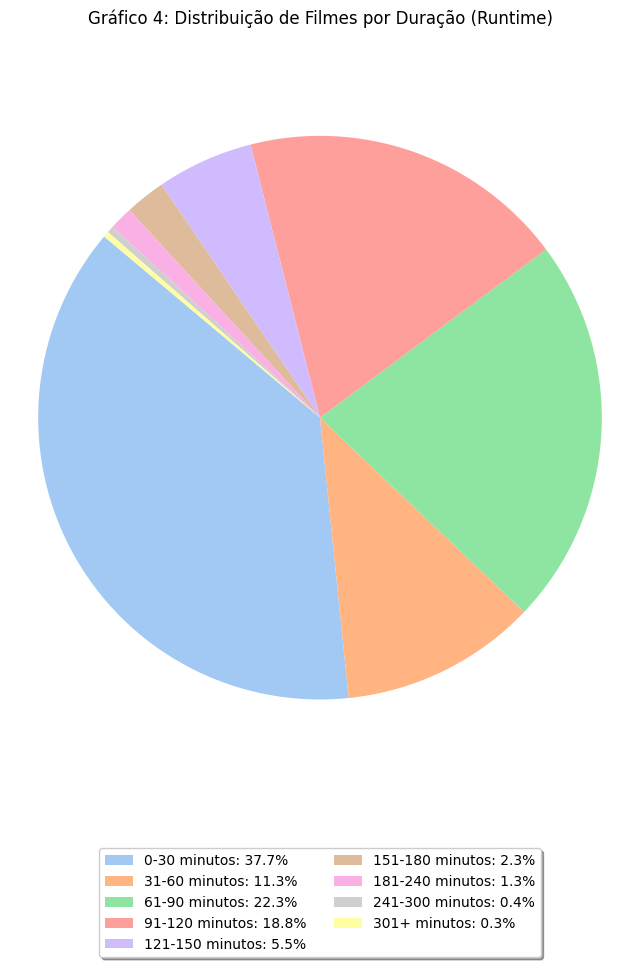

In [7]:
# Gráfico de pizza para distribuição de runtime por intervalos

# Recarrega o df
df = pd.read_csv('dados_brutos.csv', encoding='utf-8')

# Converte runtime para numérico
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')

# Filtra runtime válido e razoável
df_limpo = df.dropna(subset=['runtime'])
df_limpo = df_limpo[(df_limpo['runtime'] >= 1) & (df_limpo['runtime'] <= 600)]

# Definindo intervalos (em minutos)
bins = [0, 30, 60, 90, 120, 150, 180, 240, 300, 600] #Intervalos 
labels = ['0-30 minutos', '31-60 minutos', '61-90 minutos', '91-120 minutos', '121-150 minutos', '151-180 minutos', '181-240 minutos', '241-300 minutos', '301+ minutos']

df_limpo['runtime_range'] = pd.cut(df_limpo['runtime'], bins=bins, labels=labels, right=True)

# Conta a frequência de cada intervalo
runtime_counts = df_limpo['runtime_range'].value_counts().sort_index()

# Calcula porcentagens para o gráfico
total = runtime_counts.sum()
porcentagens = (runtime_counts / total) * 100

# Cria labels para a legenda com porcentagens
legend_labels = [f"{label}: {pct:.1f}%" for label, pct in zip(runtime_counts.index, porcentagens)]

# Define a paleta de cores do Seaborn
colors = sns.color_palette('pastel', len(runtime_counts))

plt.figure(figsize=(8,10))  
plt.pie(runtime_counts.values, startangle=140, colors=colors, textprops={'fontsize': 14})
plt.title("Gráfico 4: Distribuição de Filmes por Duração (Runtime)")
plt.axis('equal')  # Gráfico circular

# Adiciona legenda abaixo com porcentagens
plt.legend(legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)

plt.show()



### Distribuição de Runtime por Década

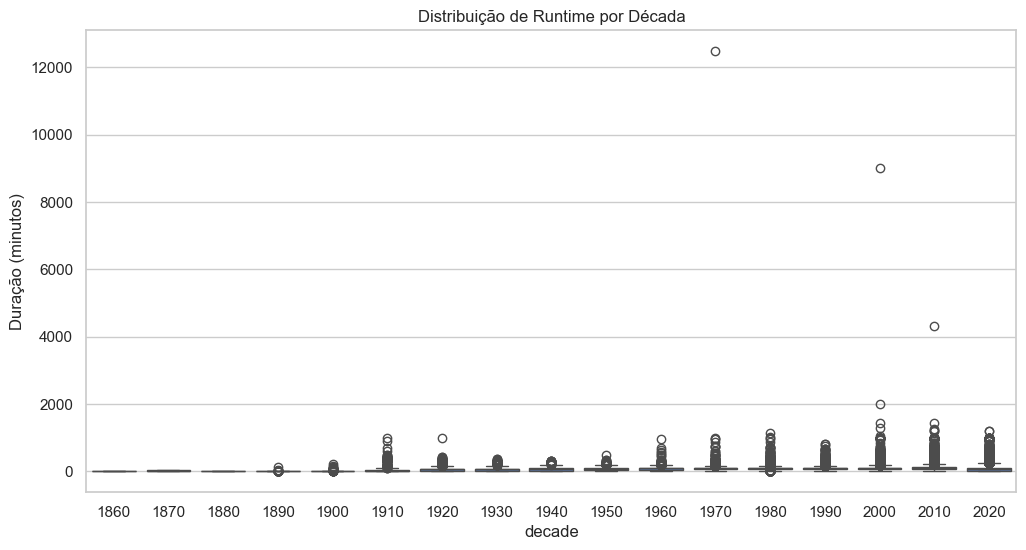

In [ ]:
# Criando a coluna de década
df['decade'] = (df['release_date'].dt.year // 10) * 10
plt.figure(figsize=(12, 6))
sns.boxplot(x='decade', y='runtime', data=df[df['runtime'] > 0])
plt.title('Distribuição de Runtime por Década')
plt.ylabel('Duração (minutos)')
plt.show()

## 3.4 Relevância Estatística: Votos vs Nota

### Identificação de Falsos Populares

Abaixo, faremos uma análise sobre os outliers, valores que podem ser erros ou exceções na base.

Como mostra o gráfico de dispersão abaixo, podemos concluir que múltiplos filmes da base de dados do IMDb estão com nota 10, porém sem nenhum voto, o que gera certa inconsistência nos dados. Para a camada silver, esses outliers serão retirados.

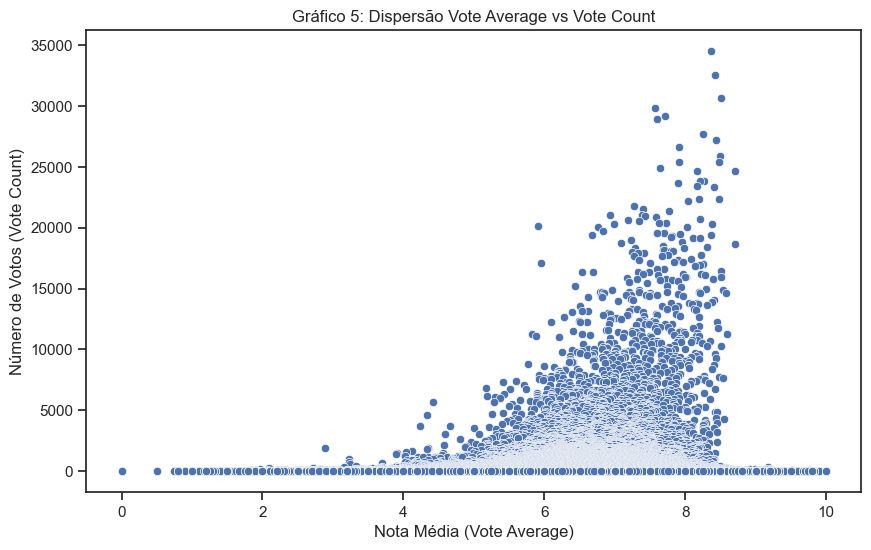

Possíveis outliers (poucos votos, nota alta):
                                        title  vote_average  vote_count
1185997                   Gazo : Zénith Paris          10.0           0
1349545                        The Audition 9          10.0           0
1213337  Christopher Titus: Zero Side Effects          10.0           0
1164702                              湘西剿匪记 上集          10.0           0
1215194                               Aerojet          10.0           0
1157982                       The Park Stroll          10.0           0
1157037                      Sons 2 the Grave          10.0           0
1123830                      THE QUEST: Nepal          10.0           0
1106806                      Sons of the Wind          10.0           0
320781       The Making of Lawrence of Arabia          10.0           1


In [36]:
# Converte para numérico e remove NaN
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')
df_limpo = df.dropna(subset=['vote_average', 'vote_count'])

# Gráfico de dispersão

sns.set_style('ticks')
plt.figure(figsize=(10,6))
sns.scatterplot(x='vote_average', y='vote_count', data=df_limpo)
plt.title('Gráfico 5: Dispersão Vote Average vs Vote Count')
plt.xlabel('Nota Média (Vote Average)')
plt.ylabel('Número de Votos (Vote Count)')
plt.show()

# Identificar possíveis outliers: filmes com poucos votos mas notas altas
# Ajuste os thresholds conforme necessário, talvez seja necessário intervalos maiores (ex: vote_count < 1000, vote_average > 7.5)
outliers = df_limpo[(df_limpo['vote_count'] < 100) & (df_limpo['vote_average'] > 8)].sort_values('vote_average', ascending=False)
print("Possíveis outliers (poucos votos, nota alta):")
print(outliers[['title', 'vote_average', 'vote_count']].head(10))

## 4. Panorama Geral

### 4.1 Indicadores Chave de Performance (KPIs) em Dashboard Cards

Este gráfico apresenta um conjunto de Indicadores Chave de Performance (KPIs), facilitando a leitura de padrões e comparações relevantes.


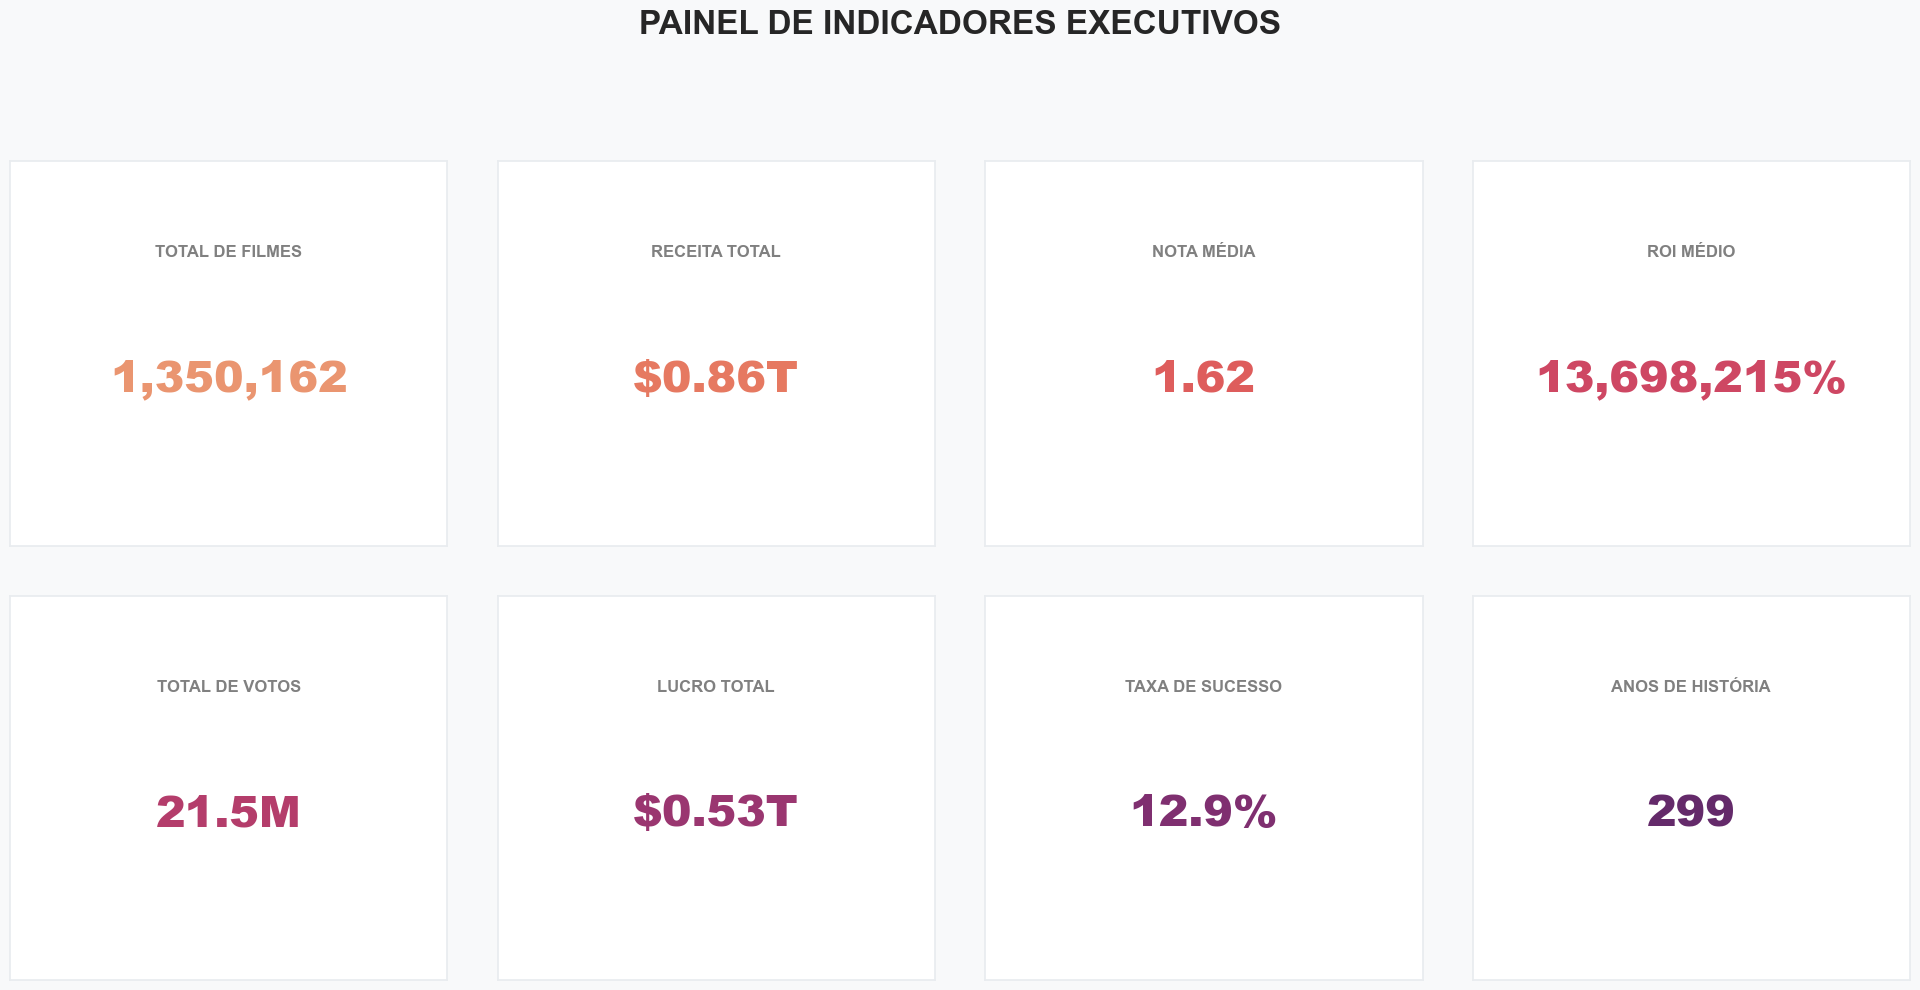

In [9]:
# --- 1. PROCESSAMENTO ULTRA RÁPIDO ---
# Convertendo apenas o necessário com métodos otimizados
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce').fillna(0)
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0)
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce').fillna(0)

# Para datas, pegamos apenas o Max e Min (não processa a coluna inteira)
data_min = pd.to_datetime(df['release_date'], errors='coerce').min()
data_max = pd.to_datetime(df['release_date'], errors='coerce').max()

# --- 2. CÁLCULO DIRETO DOS KPIs ---
total_filmes = len(df)
receita_total = df['revenue'].sum()
lucro_total = receita_total - df['budget'].sum()
nota_media_geral = df['vote_average'].mean()
votos_totais = df['vote_count'].sum()

# ROI e Sucesso (Apenas onde tem orçamento para não dar erro de divisão)
tem_budget = df[df['budget'] > 0]
roi_medio = ((tem_budget['revenue'] - tem_budget['budget']) / tem_budget['budget']).mean() * 100
taxa_sucesso = (len(tem_budget[tem_budget['revenue'] > tem_budget['budget']]) / len(tem_budget) * 100) if len(tem_budget) > 0 else 0
span_anos = int(data_max.year - data_min.year) if pd.notnull(data_max) else 0

# --- 3. DASHBOARD VISUAL ---
sns.set_theme(style="white")
cores = sns.color_palette("flare", 8)

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.patch.set_facecolor('#F8F9FA') 
fig.suptitle('PAINEL DE INDICADORES EXECUTIVOS', fontsize=24, fontweight='bold', y=1.02)

# Lista organizada para o loop
dados_kpi = [
    ('TOTAL DE FILMES', f'{total_filmes:,}'),
    ('RECEITA TOTAL', f'${receita_total/1e12:.2f}T'),
    ('NOTA MÉDIA', f'{nota_media_geral:.2f}'),
    ('ROI MÉDIO', f'{roi_medio:,.0f}%'),
    ('TOTAL DE VOTOS', f'{votos_totais/1e6:.1f}M'),
    ('LUCRO TOTAL', f'${lucro_total/1e12:.2f}T'),
    ('TAXA DE SUCESSO', f'{taxa_sucesso:.1f}%'),
    ('ANOS DE HISTÓRIA', f'{span_anos}')
]

for i, ax in enumerate(axes.flatten()):
    ax.set_facecolor('white')
    for s in ax.spines.values():
        s.set_visible(True)
        s.set_color('#E9ECEF')
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Texto: Título (Cima) e Valor (Centro)
    ax.text(0.5, 0.75, dados_kpi[i][0], ha='center', fontsize=12, fontweight='bold', color='gray', transform=ax.transAxes)
    ax.text(0.5, 0.40, dados_kpi[i][1], ha='center', fontsize=32, fontweight='black', color=cores[i], transform=ax.transAxes)

plt.tight_layout(pad=3.0)
plt.show()

### 4.2 Top 10 Filmes Mais Populares até 2024

Abaixo estão os 10 filmes com **mais votos** no IMDb até 2024, refletindo a popularidade em relação aos votos do público, observe que a popularidade não está ligada diretamente a qualidade, já que vários filmes com notas menores, estão mais populares que filmes mais bem colocados no quesito técnico e de nota

In [10]:
#Ordena os filmes mais votados
# Garante que as colunas estejam numéricas
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')

# Ordena pela quantidade de votos do maior para o menor
top_10 = df.sort_values('vote_count', ascending=False).head(10)

# Mostra título, nota e quantidade de votos
print(top_10[['title', 'vote_average', 'vote_count']].to_string(index=False))



                  title  vote_average  vote_count
              Inception         8.364       34495
           Interstellar         8.417       32571
        The Dark Knight         8.512       30619
                 Avatar         7.573       29815
           The Avengers         7.710       29166
               Deadpool         7.606       28894
 Avengers: Infinity War         8.255       27713
             Fight Club         8.438       27238
Guardians of the Galaxy         7.906       26638
           Pulp Fiction         8.488       25893


### 4.3 Distribuição dos Gêneros dos filmes

O gráfico de pizza apresenta a distribuição dos gêneros cinematográficos presentes no dataset. Observa-se a predominância de alguns gêneros específicos, enquanto os demais aparecem com menor representatividade, evidenciando a diversidade de categorias na base analisada.

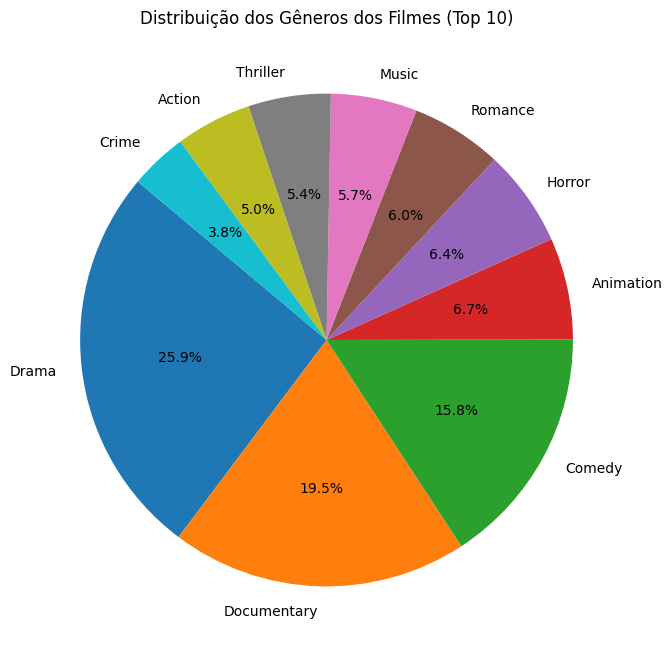

In [ ]:
# Remover valores nulos
df = df.dropna(subset=['genres'])

# Separar gêneros (assumindo separação por vírgula)
generos = (
    df['genres']
    .str.split(',')
    .explode()
    .str.strip()
)

# Contar ocorrência de cada gênero
contagem_generos = generos.value_counts().head(10)  # Top 10 para melhor visualização

# Gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(
    contagem_generos,
    labels=contagem_generos.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Distribuição dos Gêneros dos Filmes (Top 10)')
plt.show()

## 5. Análise Temporal

### 5.1 A Qualidade dos Filmes ao Longo do Tempo

Será que a qualidade dos filmes melhorou com o passar das décadas, ou a qualidade geral cinematógráfica está decaindo? 
Obviamente o padrão de exigência do telespectador aumentou, pórem, será que mesmo com um aumento das avaliações, a média geral dos filmes se mantém?

Os gráficos abaixo indicam que filmes antigos tendiam a ter notas maiores. Isso se deve porque existiam menos lançamentos e provavelmente um número de outliers considerável, porém mesmo com essas observações pode se observar que a média dos filmes de 2000 até 2020 acontece uma certa estabilização da média, com exceção de um declinio que pode ser visto no meio do intervalo, algo próximo do ano de 2010. 


year
1895.0    3.528712
1896.0    2.891893
1897.0    2.294144
1898.0    2.116858
1899.0    2.705021
            ...   
2020.0    1.897820
2021.0    1.768665
2022.0    1.764762
2023.0    1.154206
2024.0    0.502431
Name: vote_average, Length: 130, dtype: float64


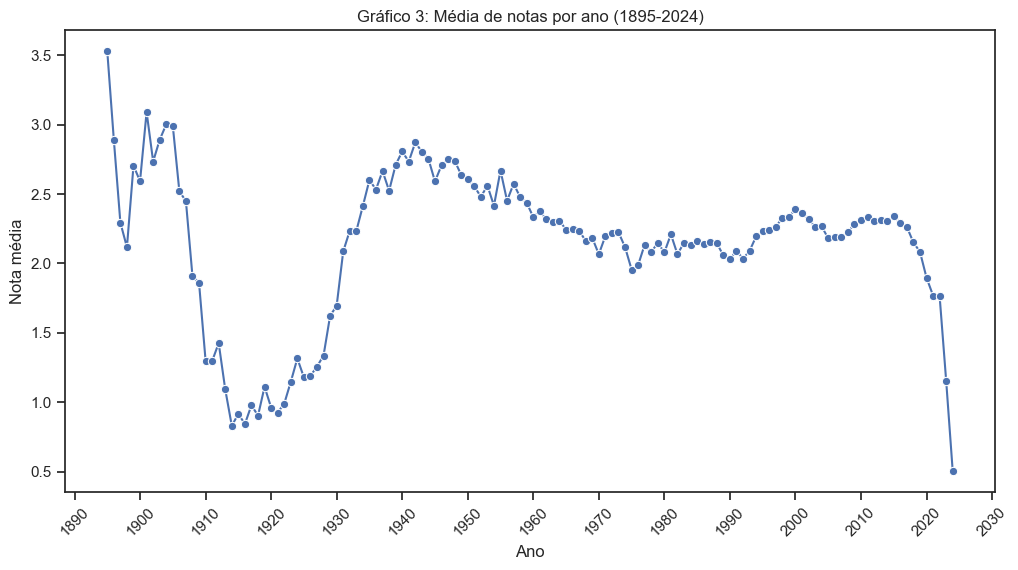

In [11]:
# Recarrega o df para garantir dados limpos
df = pd.read_csv('dados_brutos.csv', encoding='utf-8')

# Converte a coluna 'vote_average' para número, valores inválidos viram NaN
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')

# Extrai o ano da coluna 'release_date' (formato YYYY-MM-DD)
# Datetime arruma datas invalidas nessa coluna
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

# Filtra apenas linhas com ano válido
df_limpo = df.dropna(subset=['year', 'vote_average'])

# Filtra anos de 1895 a 2030 para focar em filmes reais e lançamentos recentes
df_limpo = df_limpo[(df_limpo['year'] >= 1895) & (df_limpo['year'] <= 2024)]

# Agrupa por ano e calcula a nota média de cada ano
media_por_ano = df_limpo.groupby('year')['vote_average'].mean().sort_index()

# Mostra a média de cada ano
print(media_por_ano)

# Importando Bibliotecas para plotagem
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

# Define o estilo do Seaborn
sns.set_style('ticks')

plt.figure(figsize=(12,6))
sns.lineplot(x=media_por_ano.index, y=media_por_ano.values, marker='o')
plt.title("Gráfico 3: Média de notas por ano (1895-2024)")
plt.xlabel("Ano")
plt.ylabel("Nota média")

# Configura os intervalos do eixo X para 10 em 10 anos
plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.xticks(rotation=45)  # Rotaciona os labels para melhor visualização

plt.show()

### 5.2 Sazonalidade de Lançamentos (por mês)

Este gráfico apresenta Sazonalidade de Lançamentos (por mês), facilitando a leitura de padrões e comparações relevantes.


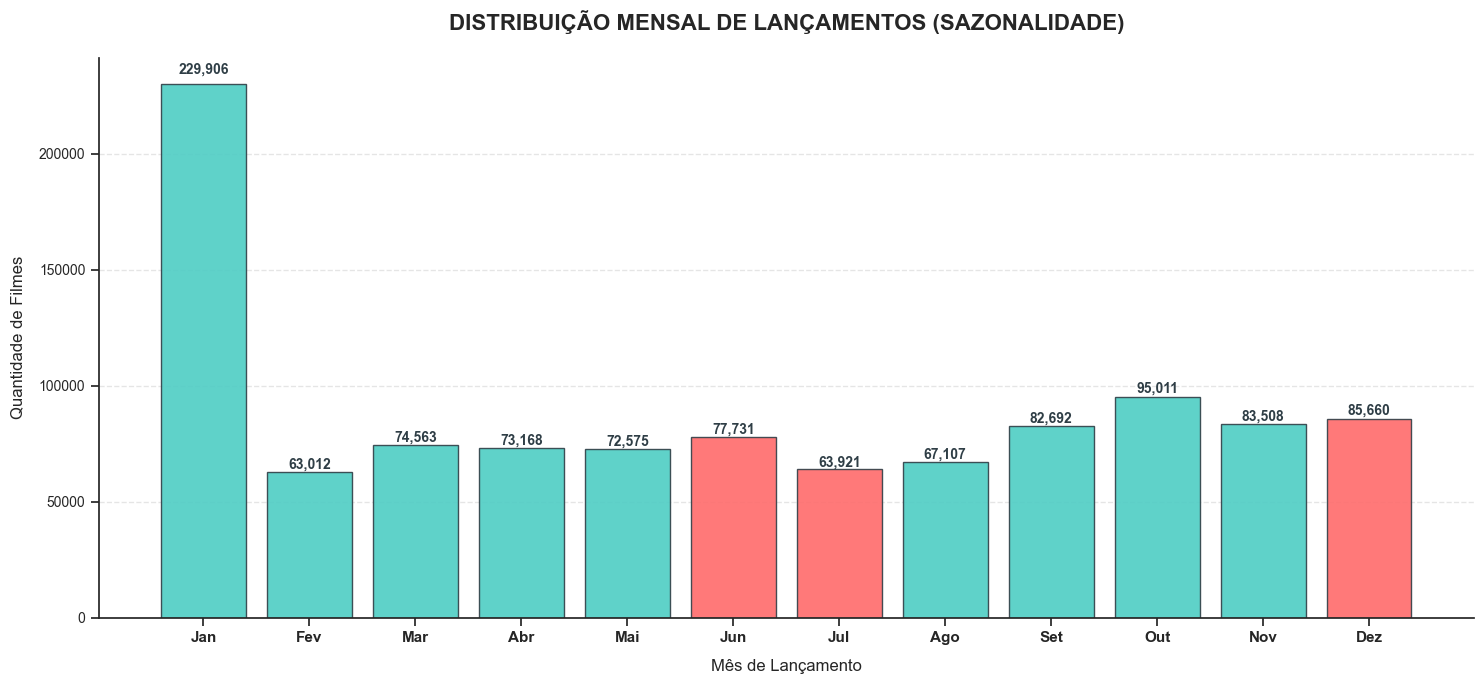

In [12]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Filtra apenas filmes com data válida
df_vendas = df[df['release_date'].notna()].copy()
df_vendas['month'] = df_vendas['release_date'].dt.month

# Contagem por mês
lancamentos_por_mes = df_vendas['month'].value_counts().sort_index()

# Configurações do gráfico
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

plt.figure(figsize=(15, 7))
fig.patch.set_facecolor('#F8F9FA')

# Cores das barras
cores_barra = ['#4ECDC4' for _ in range(12)]
# Destacando Junho (6), Julho (7) e Dezembro (12)
for m in [5, 6, 11]: cores_barra[m] = '#FF6B6B' 

# 3. PLOTAGEM
plt.bar(range(1, 13), lancamentos_por_mes.values, color=cores_barra, edgecolor='#2F3E46', alpha=0.9)

# Estilização
plt.xticks(range(1, 13), meses, fontsize=11, fontweight='bold')
plt.yticks(fontsize=10)
plt.xlabel('Mês de Lançamento', fontsize=12, labelpad=10)
plt.ylabel('Quantidade de Filmes', fontsize=12, labelpad=10)
plt.title('DISTRIBUIÇÃO MENSAL DE LANÇAMENTOS (SAZONALIDADE)', fontsize=16, fontweight='bold', pad=20)

# Adicionar os valores no topo de cada barra
for i, v in enumerate(lancamentos_por_mes.values):
    plt.text(i + 1, v + (v * 0.02), f'{v:,}', ha='center', fontsize=10, fontweight='bold', color='#2F3E46')

plt.grid(True, axis='y', linestyle='--', alpha=0.5)
sns.despine() # Remove as bordas desnecessárias
plt.tight_layout()
plt.show()

# 4. RESULTADOS EM TEXTO
mes_mais_idx = lancamentos_por_mes.idxmax()
mes_menos_idx = lancamentos_por_mes.idxmin()

### 5.3 Evolução da Receita Total da Indústria Cinematográfica (1920-2024)

Este gráfico apresenta Evolução da Receita Total da Indústria Cinematográfica (1920-2024).

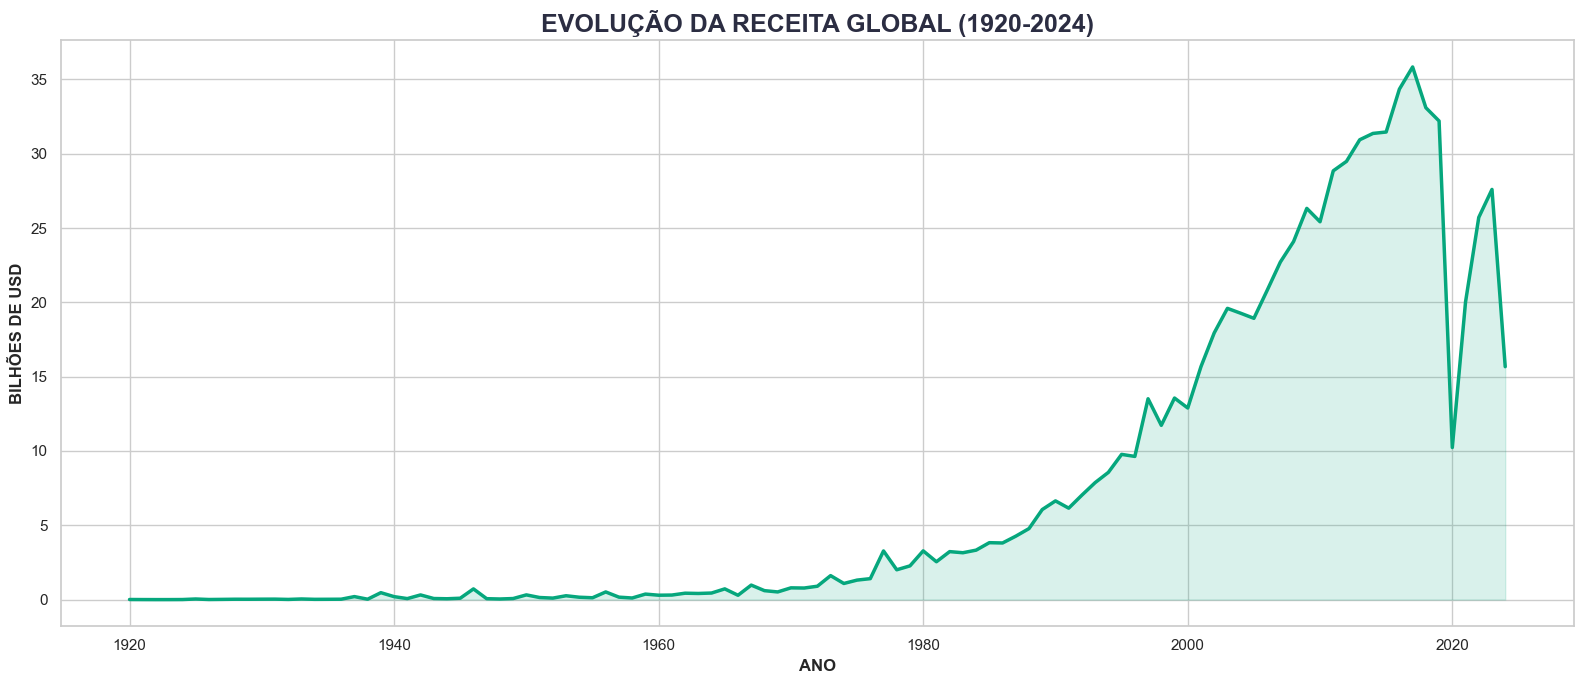

In [13]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

df_temporal = df[(df['year'] >= 1920) & (df['year'] <= 2024)].copy()
receita_por_ano = df_temporal.groupby('year')['revenue'].sum() / 1e9

sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 7))

plt.plot(receita_por_ano.index, receita_por_ano.values, linewidth=2.5, color='#06A77D')
plt.fill_between(receita_por_ano.index, receita_por_ano.values, alpha=0.15, color='#06A77D')

plt.title('EVOLUÇÃO DA RECEITA GLOBAL (1920-2024)', fontsize=18, fontweight='bold', color='#2B2D42')
plt.xlabel('ANO', fontweight='bold')
plt.ylabel('BILHÕES DE USD', fontweight='bold')

plt.tight_layout()
plt.show()

##  6. Segmentação de Mercado e Produção

### 6.1 Contagem de Produtoras por Filme

Muitas vezes, filmes são produzidos por múltiplas produtoras. Abaixo, podemos ver a contagem de produtoras envolvidas na produção dos filmes.

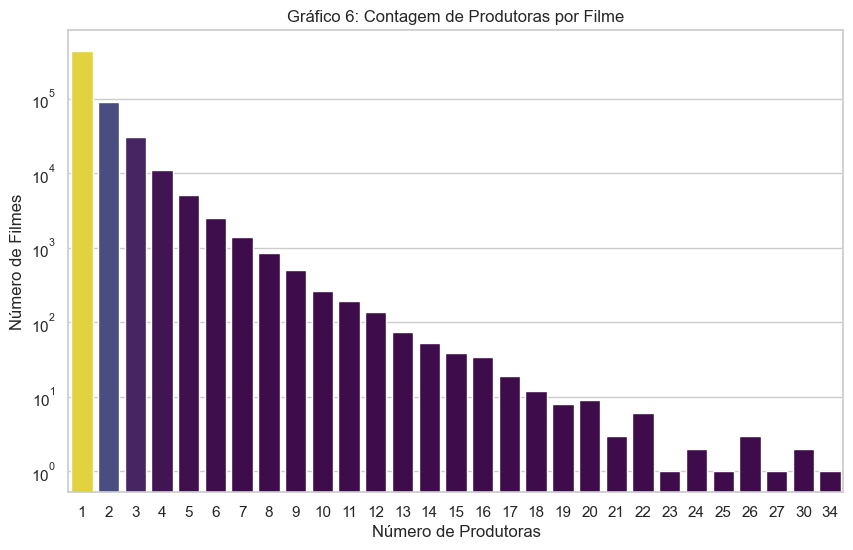

In [14]:
# Análise das Produtoras com Mais Filmes Produzidos

# Recarrega o df
df = pd.read_csv('dados_brutos.csv', encoding='utf-8')

# Contagem de produtoras por filme
from collections import Counter
produtora_counter = Counter()

for produtoras in df['production_companies'].dropna():
    # Contar quantidade de produtoras no filme
    produtoras_list = produtoras.split(',')
    produtoras_count = len(produtoras_list)
    produtora_counter[produtoras_count] += 1

# Converte o Counter para DataFrame para facilitar a plotagem
produtora_df = pd.DataFrame.from_dict(produtora_counter, orient='index', columns=['Número de Filmes'])
produtora_df.index.name = 'Número de Produtoras'
produtora_df = produtora_df.sort_index()

# Plotagem
plt.figure(figsize=(10,6))
ax = sns.barplot(x=produtora_df.index, y=produtora_df['Número de Filmes'], palette="viridis", hue=produtora_df['Número de Filmes'], legend=False)
ax.set_yscale('log')  # Escala logarítmica para melhor visualização
plt.title("Gráfico 6: Contagem de Produtoras por Filme")
plt.xlabel("Número de Produtoras")
plt.ylabel("Número de Filmes")
plt.show()

### 6.2 Produtoras com Mais Filmes Produzidos

O objetivo desta análise é identificar as produtoras que mais contribuíram para a indústria cinematográfica em termos de quantidade de filmes produzidos.

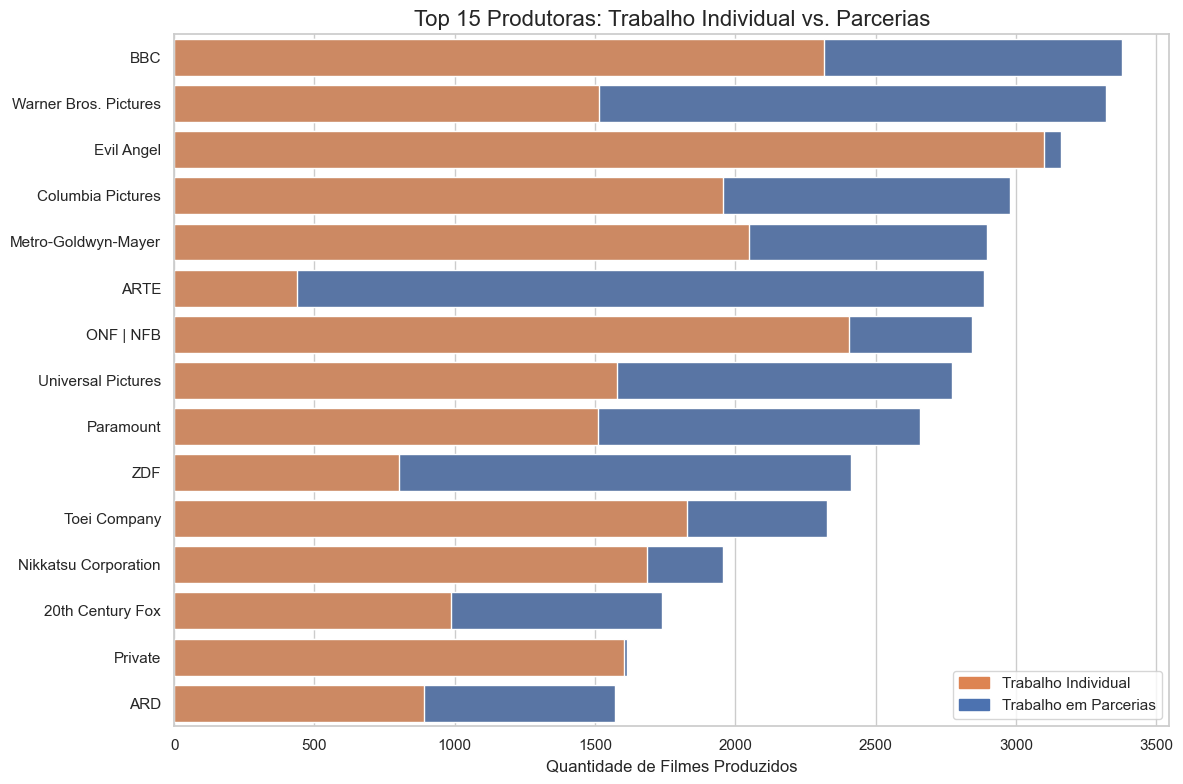

In [15]:
# Análise Comparativa: Trabalho Individual vs. Parcerias nas Top 15 Produtoras

# 1. Carrega e limpa
df = pd.read_csv('dados_brutos.csv', encoding='utf-8')
df = df.dropna(subset=['production_companies'])

# 2. Prepara os dados

# Calcular o TOTAL de aparições (Geral)
total_counts = df['production_companies'].str.split(', ').explode().value_counts()

# Calcular o valor INDIVIDUAL (Solo)
solo_movies = df[~df['production_companies'].str.contains(',')]
solo_counts = solo_movies['production_companies'].value_counts()

# Top 15 produtoras
top_15 = total_counts.head(15).index

df_plot = pd.DataFrame({
    'Produtora': top_15,
    'Total': total_counts[top_15].values,
    'Individual': solo_counts.reindex(top_15, fill_value=0).values
})

df_plot = df_plot.sort_values('Total', ascending=False)

# Plotagem (sobrepor barras)

plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# 1. Camada de Fundo (TOTAL)
sns.barplot(
    data=df_plot, 
    x='Total', 
    y='Produtora', 
    color='#4c72b0',
    label='Trabalho em Parcerias',
    edgecolor='white'
)

# 2. Camada da Frente (INDIVIDUAL)
sns.barplot(
    data=df_plot, 
    x='Individual', 
    y='Produtora', 
    color='#dd8452',
    label='Trabalho Individual',
    edgecolor='white'
)

plt.title('Top 15 Produtoras: Trabalho Individual vs. Parcerias', fontsize=16)
plt.xlabel('Quantidade de Filmes Produzidos', fontsize=12)
plt.ylabel('')

top_bar = mpatches.Patch(color='#dd8452', label='Trabalho Individual')
bottom_bar = mpatches.Patch(color='#4c72b0', label='Trabalho em Parcerias')
plt.legend(handles=[top_bar, bottom_bar], loc='lower right', frameon=True)

plt.tight_layout()
plt.show()

### 6.3 Análise da Receita por Quantidade de Produtoras

O objetivo é verificar se o número de produtoras impacta o sucesso financeiro do filme. Para evitar distorções causadas por sucessos isolados (outliers), focaremos na mediana da receita, buscando entender qual é o retorno financeiro mais realista e típico para cada cenário.

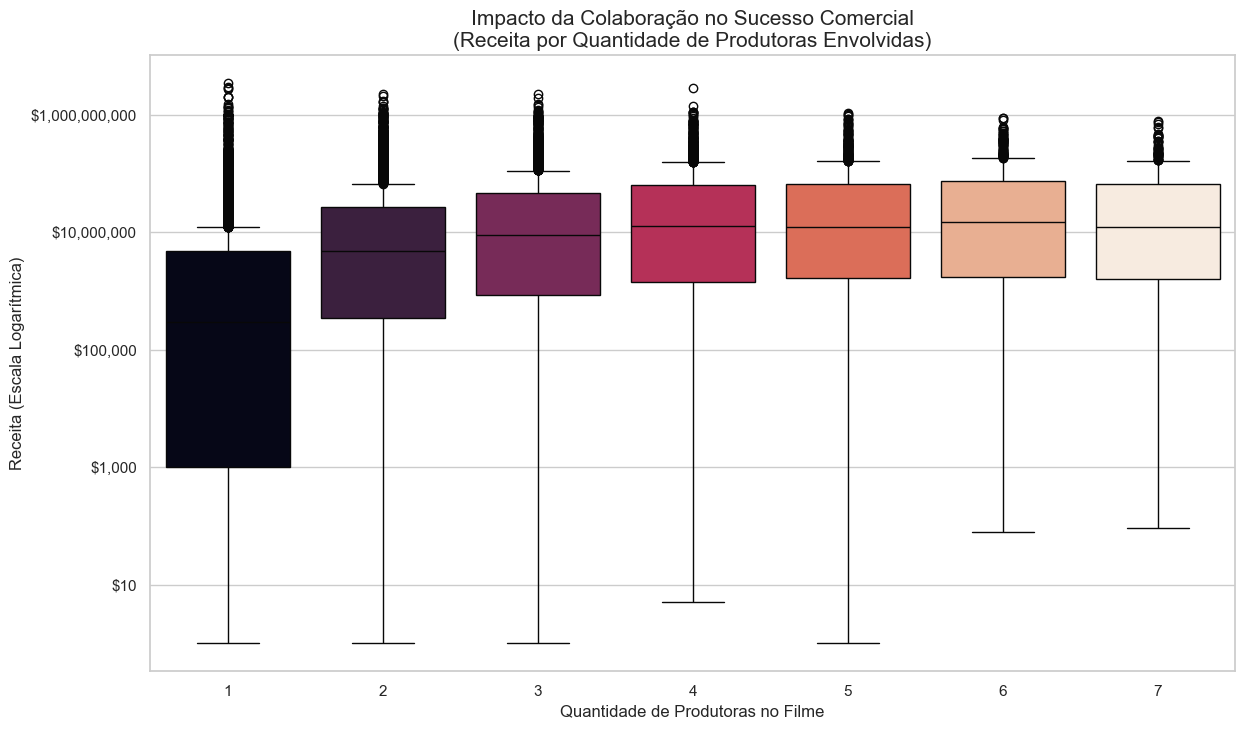

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df['qtd_produtoras'] = df['production_companies'].fillna('a').apply(lambda x: len(str(x).split(',')))

df_financeiro = df[
    (df['qtd_produtoras'] <= 7) &
    (df['revenue'] > 0) 
]

plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

ax = sns.boxplot(
    data=df_financeiro,
    x='qtd_produtoras',
    y='revenue',
    palette='rocket',
    hue='qtd_produtoras',
    legend=False
)

ax.set_yscale("log")

# Títulos e Labels
ax.set_title('Impacto da Colaboração no Sucesso Comercial\n(Receita por Quantidade de Produtoras Envolvidas)', fontsize=15)
ax.set_xlabel('Quantidade de Produtoras no Filme', fontsize=12)
ax.set_ylabel('Receita (Escala Logarítmica)', fontsize=12)

import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '${:,.0f}'.format(y)))

plt.show()

### 6.4 Top 15 Gêneros por Receita Total

Este gráfico apresenta Top 15 Gêneros por Receita Total, facilitando a leitura de padrões e comparações relevantes.


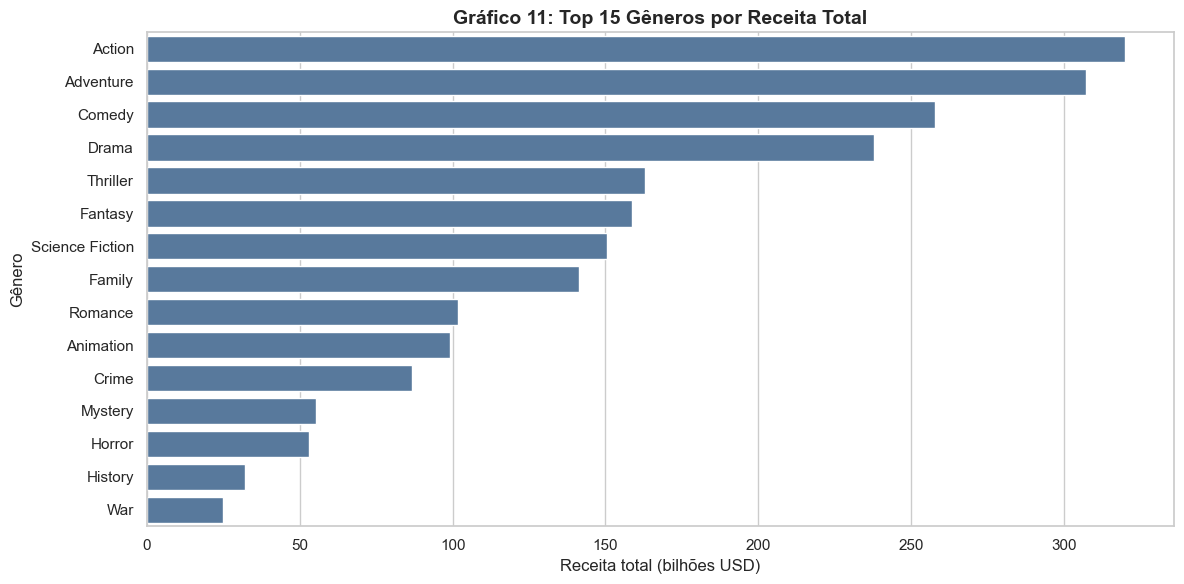

In [17]:
# Top 15 gêneros por receita total

df_gen = df[df["genres"].notna() & (df["revenue"] > 0)][["genres", "revenue"]].copy()
df_gen = df_gen.assign(genre=df_gen["genres"].str.split(", ")).explode("genre")
df_gen["genre"] = df_gen["genre"].str.strip()
df_gen = df_gen[(df_gen["genre"] != "") & (df_gen["genre"] != "nan")]

genre_revenue = df_gen.groupby("genre")["revenue"].sum().nlargest(15).reset_index()
genre_revenue["revenue_bi"] = genre_revenue["revenue"] / 1e9

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_revenue, x="revenue_bi", y="genre", color="#4C78A8")
plt.xlabel("Receita total (bilhões USD)")
plt.ylabel("Gênero")
plt.title("Gráfico 11: Top 15 Gêneros por Receita Total", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


### 6.5 Top 15 Países Produtores (por volume)

Este gráfico apresenta Top 15 Países Produtores (por volume), facilitando a leitura de padrões e comparações relevantes.


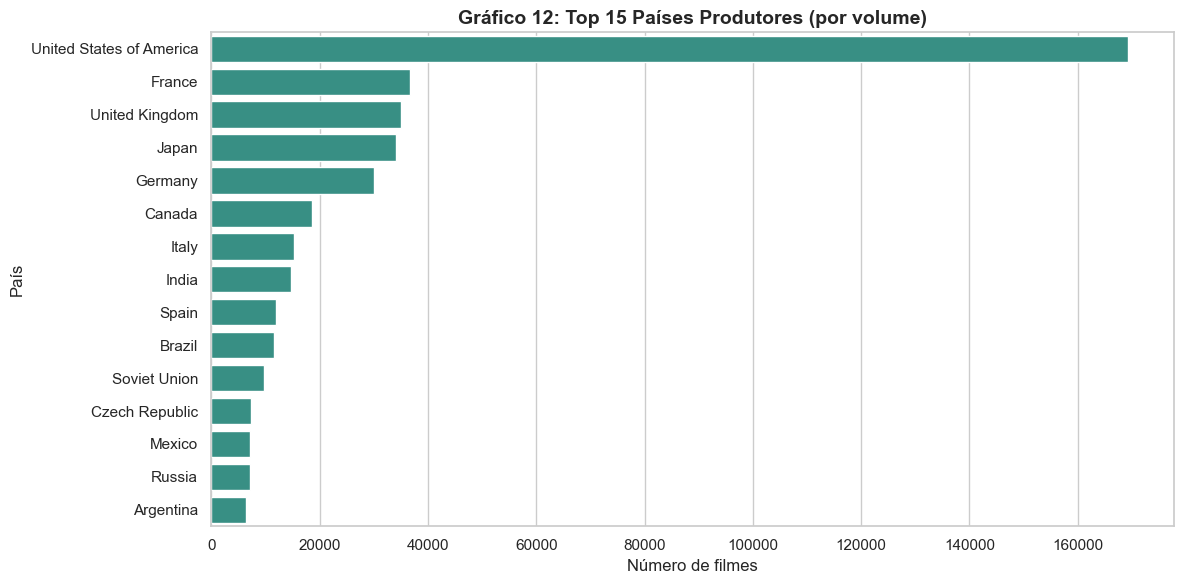

In [18]:
# Top 15 países produtores (por volume)

df_country = df[df["production_countries"].notna()][["production_countries"]].copy()
df_country = df_country.assign(country=df_country["production_countries"].str.split(", ")).explode("country")
df_country["country"] = df_country["country"].str.strip()
df_country = df_country[(df_country["country"] != "") & (df_country["country"] != "nan")]

country_counts = df_country["country"].value_counts().head(15).reset_index()
country_counts.columns = ["country", "count"]

plt.figure(figsize=(12, 6))
sns.barplot(data=country_counts, x="count", y="country", color="#2A9D8F")
plt.xlabel("Número de filmes")
plt.ylabel("País")
plt.title("Gráfico 12: Top 15 Países Produtores (por volume)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


### 6.6 Correlação entre Variáveis Financeiras e Popularidade
O gráfico busca verificar se há relação entre variáveis de popularidade com o investimento e/ou o lucro gerado pelo filme. 

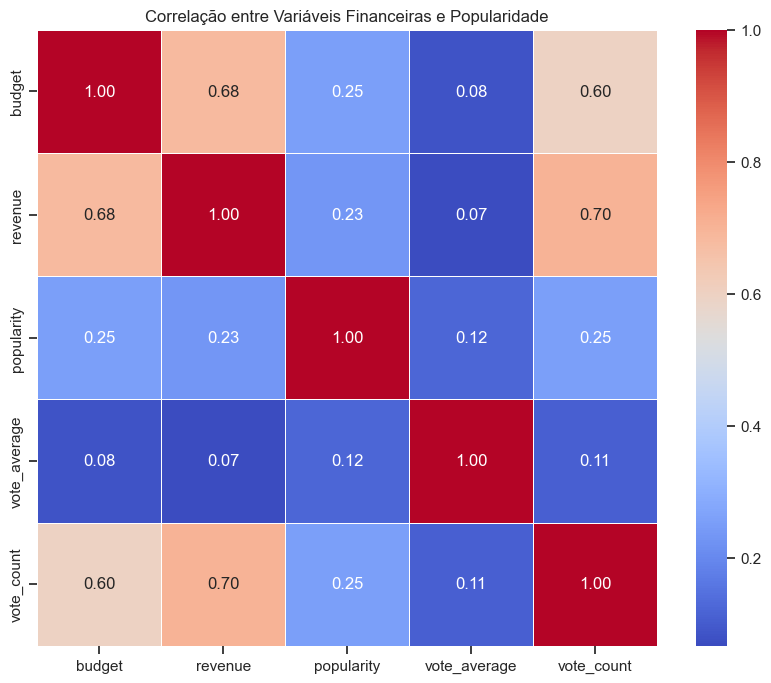

In [39]:
cols_fin = ['budget', 'revenue', 'popularity', 'vote_average', 'vote_count']
corr_matrix = df[cols_fin].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlação entre Variáveis Financeiras e Popularidade')
plt.show()

## 7. Análise Financeira

### 7.1 Heatmap de ROI médio por década e gênero (top 8)
Este gráfico apresenta Heatmap de ROI médio por década e gênero (top 8), facilitando a leitura de padrões e comparações relevantes.

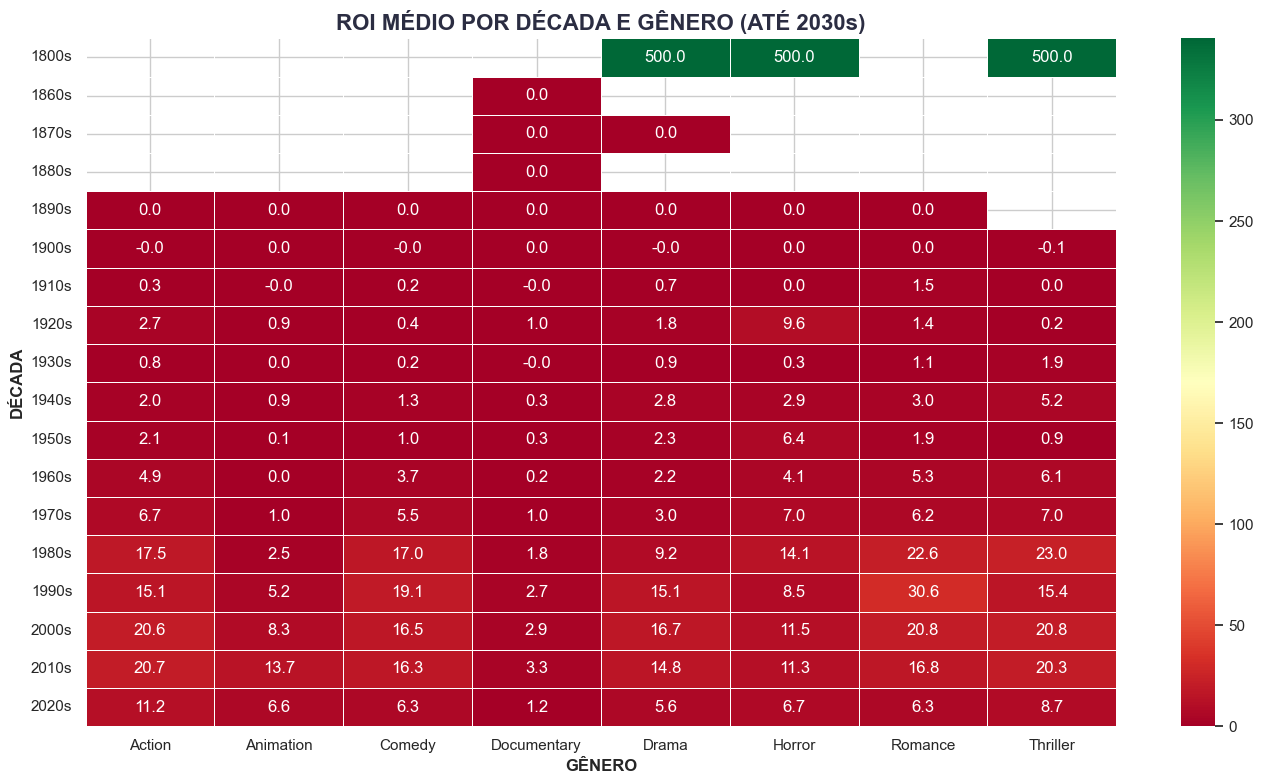

In [20]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year
df['roi'] = (df['revenue'] - df['budget']) / df['budget'].replace(0, 1)

# Filtra até o fim da década de 2020
df = df[df['year'] <= 2029].copy()
df['decade'] = (df['year'] // 10 * 10).fillna(0).astype(int).astype(str) + 's'

roi_cap_99 = df['roi'].quantile(0.99)
df_gen_roi = df[df["genres"].notna()][["genres", "roi", "decade"]].copy()
df_gen_roi["roi"] = df_gen_roi["roi"].clip(upper=roi_cap_99)

df_gen_roi = df_gen_roi.assign(genre=df_gen_roi["genres"].str.split(", ")).explode("genre")
df_gen_roi["genre"] = df_gen_roi["genre"].str.strip()
df_gen_roi = df_gen_roi[df_gen_roi["genre"] != ""]

top_genres = df_gen_roi["genre"].value_counts().head(8).index
pivot_gen = df_gen_roi[df_gen_roi["genre"].isin(top_genres)].groupby(["decade", "genre"])["roi"].mean().unstack()
pivot_gen = pivot_gen.sort_index()

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_gen, cmap="RdYlGn", annot=True, fmt=".1f", linewidths=0.5, robust=True)

plt.title("ROI MÉDIO POR DÉCADA E GÊNERO (ATÉ 2030s)", fontsize=16, fontweight="bold", color='#2B2D42')
plt.xlabel("GÊNERO", fontweight="bold")
plt.ylabel("DÉCADA", fontweight="bold")

plt.tight_layout()
plt.show()

### 6.7 Duração x Popularidade

Este gráfico apresenta a relação entre a duração dos filmes (runtime) e sua pontuação de popularidade (popularity). Cada ponto representa um filme do dataset, permitindo identificar padrões gerais e a presença de valores atípicos. Observa-se que a maioria dos filmes se concentra em durações médias, enquanto alguns títulos com tempo de exibição muito elevado ou muito reduzido se destacam como outliers. A visualização também possibilita analisar se filmes mais longos tendem, ou não, a apresentar maior popularidade junto ao público.

/tmp/ipykernel_754/2361255665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
/tmp/ipykernel_754/2361255665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')


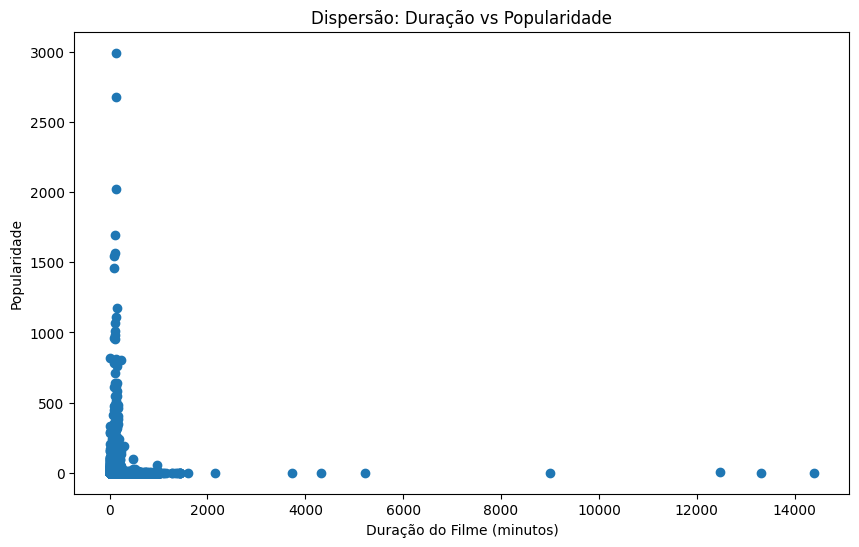

Top 10 filmes com maior pontuação de popularidade:
                                                   title  runtime  popularity
3869                                         Blue Beetle      128    2994.357
5052                                        Gran Turismo      135    2680.593
51137  A Female Boss with Big Tits and Her Cherry Boy...      120    2020.286
7927                                          The Nun II      110    1692.778
2130                                   Meg 2: The Trench      116    1567.273
9958                                         Retribution       91    1547.220
4021                                          Talk to Me       95    1458.514
1110                                              Fast X      142    1175.267
6397                                    Sound of Freedom      131    1111.036
825                                               Barbie      114    1069.340

Top 10 filmes maior duração:
                                title  runtime  popularity
21

In [ ]:
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df_limpo = df.dropna(subset=['runtime', 'popularity'])

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df_limpo['runtime'], df_limpo['popularity'])
plt.title('Dispersão: Duração vs Popularidade')
plt.xlabel('Duração do Filme (minutos)')
plt.ylabel('Popularidade')
plt.show()

# Define rankings
popularityRank = df.sort_values(by='popularity', ascending=False).head(10)
runtimeRank = df.sort_values(by='runtime', ascending=False).head(10)

# Selecionar colunas relevantes
resultado = popularityRank[['title', 'runtime', 'popularity']]

print("Top 10 filmes com maior pontuação de popularidade:")
print(resultado)

resultado = runtimeRank[['title', 'runtime', 'popularity']]
print("\nTop 10 filmes maior duração:")
print(resultado)


### 7.2 Orçamento vs Lucro

Este gráfico apresenta Orçamento vs Lucro, facilitando a leitura de padrões e comparações relevantes.

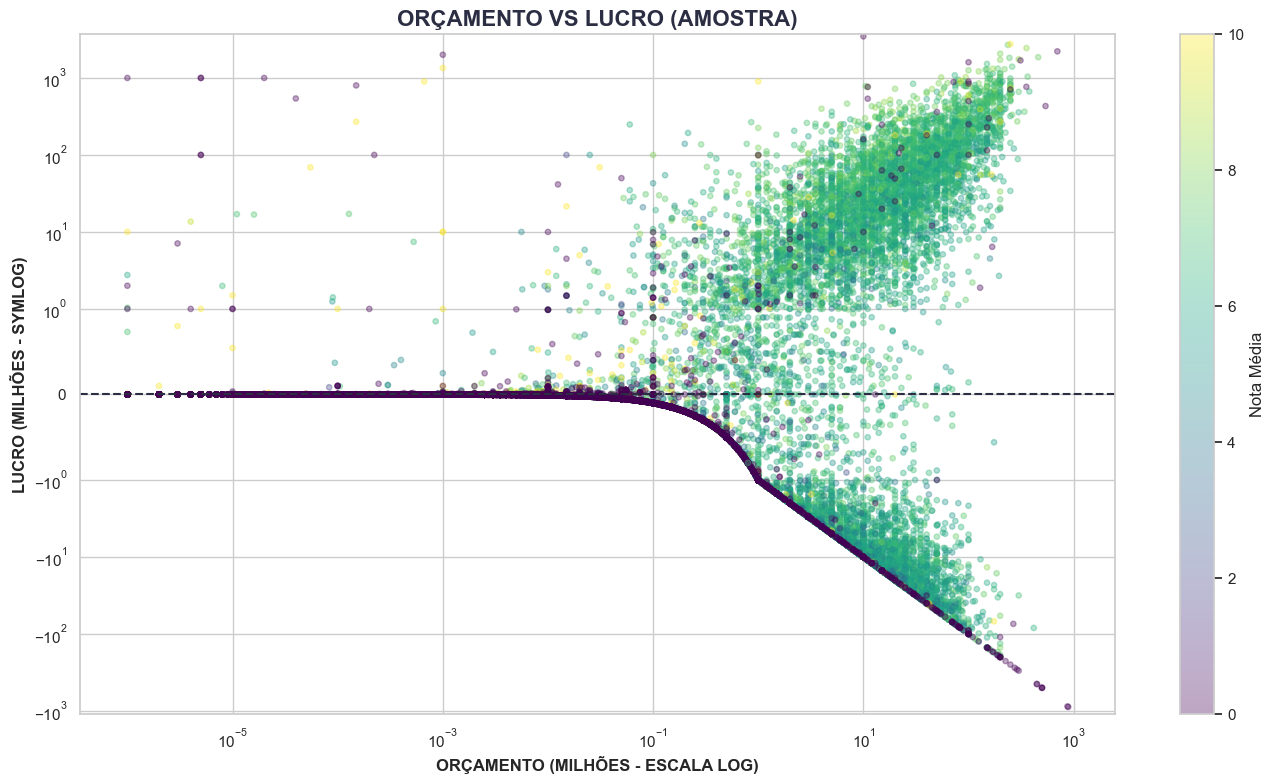

In [21]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0)
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce').fillna(0)
df['profit'] = df['revenue'] - df['budget']
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce').fillna(0)

df_plot = df[df['budget'] > 0].copy()
if len(df_plot) > 50000:
    df_plot = df_plot.sample(50000, random_state=42)

plt.figure(figsize=(14, 8))
sc = plt.scatter(df_plot["budget"] / 1e6, df_plot["profit"] / 1e6,
                 alpha=0.35, s=15, c=df_plot["vote_average"], cmap="viridis")

plt.colorbar(sc, label="Nota Média")
plt.xscale("log")
plt.yscale("symlog", linthresh=1)
plt.axhline(0, color="#2B2D42", linestyle="--", linewidth=1.5)

plt.xlabel("ORÇAMENTO (MILHÕES - ESCALA LOG)", fontweight="bold")
plt.ylabel("LUCRO (MILHÕES - SYMLOG)", fontweight="bold")
plt.title("ORÇAMENTO VS LUCRO (AMOSTRA)", fontsize=16, fontweight="bold", color='#2B2D42')

plt.tight_layout()
plt.show()